In [1]:
import random
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option("display.max_rows", None)

# TEAM

In [2]:
train_home_team = pd.read_csv("./Train_Data/train_home_team_statistics_df.csv")
train_away_team = pd.read_csv("./Train_Data/train_away_team_statistics_df.csv")

train_scores = pd.read_csv("./Target/target.csv")

In [3]:
train_home_team.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


## Work on features

In [4]:
train_home_team.columns.to_list()

['ID',
 'LEAGUE',
 'TEAM_NAME',
 'TEAM_SHOTS_TOTAL_season_sum',
 'TEAM_SHOTS_INSIDEBOX_season_sum',
 'TEAM_SHOTS_OFF_TARGET_season_sum',
 'TEAM_SHOTS_ON_TARGET_season_sum',
 'TEAM_SHOTS_OUTSIDEBOX_season_sum',
 'TEAM_PASSES_season_sum',
 'TEAM_SUCCESSFUL_PASSES_season_sum',
 'TEAM_SAVES_season_sum',
 'TEAM_CORNERS_season_sum',
 'TEAM_FOULS_season_sum',
 'TEAM_YELLOWCARDS_season_sum',
 'TEAM_REDCARDS_season_sum',
 'TEAM_OFFSIDES_season_sum',
 'TEAM_ATTACKS_season_sum',
 'TEAM_PENALTIES_season_sum',
 'TEAM_SUBSTITUTIONS_season_sum',
 'TEAM_BALL_SAFE_season_sum',
 'TEAM_DANGEROUS_ATTACKS_season_sum',
 'TEAM_INJURIES_season_sum',
 'TEAM_GOALS_season_sum',
 'TEAM_GAME_WON_season_sum',
 'TEAM_GAME_DRAW_season_sum',
 'TEAM_GAME_LOST_season_sum',
 'TEAM_SHOTS_TOTAL_season_average',
 'TEAM_SHOTS_INSIDEBOX_season_average',
 'TEAM_SHOTS_OFF_TARGET_season_average',
 'TEAM_SHOTS_ON_TARGET_season_average',
 'TEAM_SHOTS_OUTSIDEBOX_season_average',
 'TEAM_PASSES_season_average',
 'TEAM_SUCCESSFUL_PASS

In [5]:
prefix_features = list(set([
    feat
    .replace("_season_sum", "")
    .replace("_season_average", "")
    .replace("_season_std", "")
    .replace("_5_last_match_sum", "")
    .replace("_5_last_match_average", "")
    .replace("_5_last_match_std", "")
    for feat in train_home_team.columns.to_list(
    )
]))[1:]
prefix_features

['TEAM_SHOTS_ON_TARGET',
 'TEAM_FOULS',
 'TEAM_SHOTS_OFF_TARGET',
 'TEAM_ATTACKS',
 'TEAM_PENALTIES',
 'TEAM_GAME_WON',
 'LEAGUE',
 'TEAM_SHOTS_INSIDEBOX',
 'TEAM_SHOTS_OUTSIDEBOX',
 'TEAM_INJURIES',
 'TEAM_SUCCESSFUL_PASSES_PERCENTAGE',
 'TEAM_NAME',
 'TEAM_BALL_POSSESSION',
 'TEAM_SAVES',
 'TEAM_PASSES',
 'TEAM_DANGEROUS_ATTACKS',
 'TEAM_CORNERS',
 'TEAM_GAME_LOST',
 'ID',
 'TEAM_SUBSTITUTIONS',
 'TEAM_SUCCESSFUL_PASSES',
 'TEAM_GOALS',
 'TEAM_GAME_DRAW',
 'TEAM_BALL_SAFE',
 'TEAM_YELLOWCARDS',
 'TEAM_SHOTS_TOTAL',
 'TEAM_REDCARDS']

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

for pref in prefix_features:
    prefix_feat = pref
    time_frame = "5_last_match"
    try:
        feats = [
            f"{prefix_feat}_5_last_match_sum",
            f"{prefix_feat}_5_last_match_average",
            f"{prefix_feat}_5_last_match_std",
            f"{prefix_feat}_season_sum",
            f"{prefix_feat}_season_average",
            f"{prefix_feat}_season_std",
        ]
        feats = [feat for feat in feats if feat in train_home_team.columns.to_list()]

        plt.hist(
            train_home_team[feats], label=feats
        )
        plt.legend()
        plt.title(pref)
        plt.show()
    except Exception as e:
        print(f"ERROR feat : {pref} ({e})")

In [29]:
def data_proc(df_base: pd.DataFrame):

    augmented_train_X_team = df_base.copy(deep=True)

    augmented_train_X_team["TEAM_GAME_WON_PERCENTAGE_season"] = df_base["TEAM_GAME_WON_season_sum"] / (df_base["TEAM_GAME_WON_season_sum"] + df_base["TEAM_GAME_LOST_season_sum"] + df_base["TEAM_GAME_DRAW_season_sum"])*10
    augmented_train_X_team["TEAM_GAME_LOST_PERCENTAGE_season"] = df_base["TEAM_GAME_LOST_season_sum"] / (df_base["TEAM_GAME_WON_season_sum"] + df_base["TEAM_GAME_LOST_season_sum"] + df_base["TEAM_GAME_DRAW_season_sum"])*10

    augmented_train_X_team["TEAM_GAME_WON_PERCENTAGE_5_last_match"] = df_base["TEAM_GAME_WON_5_last_match_sum"] / (df_base["TEAM_GAME_WON_5_last_match_sum"] + df_base["TEAM_GAME_LOST_5_last_match_sum"] + df_base["TEAM_GAME_DRAW_5_last_match_sum"])*10
    augmented_train_X_team["TEAM_GAME_LOST_PERCENTAGE_5_last_match"] = df_base["TEAM_GAME_LOST_5_last_match_sum"] / (df_base["TEAM_GAME_WON_5_last_match_sum"] + df_base["TEAM_GAME_LOST_5_last_match_sum"] + df_base["TEAM_GAME_DRAW_5_last_match_sum"])*10

    augmented_train_X_team["TEAM_SHOTS_ON_TARGET_PERCENTAGE_season"] = df_base["TEAM_SHOTS_ON_TARGET_season_sum"] / (df_base["TEAM_SHOTS_ON_TARGET_season_sum"] + df_base["TEAM_SHOTS_OFF_TARGET_season_sum"])*10

    augmented_train_X_team["TEAM_SHOTS_ON_TARGET_PERCENTAGE_5_last_match"] = df_base["TEAM_SHOTS_ON_TARGET_5_last_match_sum"] / (df_base["TEAM_SHOTS_ON_TARGET_5_last_match_sum"] + df_base["TEAM_SHOTS_OFF_TARGET_5_last_match_sum"])*10

    augmented_train_X_team["TEAM_SHOTS_INSIDEBOX_PERCENTAGE_season"] = df_base["TEAM_SHOTS_INSIDEBOX_season_sum"] / (df_base["TEAM_SHOTS_INSIDEBOX_season_sum"] + df_base["TEAM_SHOTS_OUTSIDEBOX_season_sum"])*10

    augmented_train_X_team["TEAM_SHOTS_INSIDEBOX_PERCENTAGE_5_last_match"] = df_base["TEAM_SHOTS_INSIDEBOX_5_last_match_sum"] / (df_base["TEAM_SHOTS_INSIDEBOX_5_last_match_sum"] + df_base["TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum"])*10

    augmented_train_X_team["TEAM_DANGEROUS_ATTACK_PERCENTAGE_5_last_match"] = (df_base["TEAM_DANGEROUS_ATTACKS_season_sum"] / df_base["TEAM_ATTACKS_season_sum"])*10
    
    augmented_train_X_team["TEAM_DANGEROUS_ATTACK_PERCENTAGE_5_last_match"] = (df_base["TEAM_DANGEROUS_ATTACKS_season_sum"] / df_base["TEAM_ATTACKS_season_sum"]).apply(lambda x: min(x, 11))*10


    evolution = pd.DataFrame()
    features_5_last = [feat for feat in df_base.columns if "5_last_match" in feat]
    features_season = [feat.replace("5_last_match", "season") for feat in features_5_last]

    for feat_5_last, feat_season in zip(features_5_last, features_season):
        evolution = pd.concat([
            evolution,
            pd.Series(
                ((df_base[feat_5_last] - df_base[feat_season])/df_base[feat_season]).apply(lambda x:min(x, 10)),
                name=feat_season.replace("season", "EVOLUTION")
            )
        ], axis=1)
    augmented_train_X_team = pd.concat([augmented_train_X_team, evolution], axis=1)

    # augmented_train_X_team = pd.concat([
    #     augmented_train_X_team,
    #     evolution
    # ], axis=1)

    # augmented_train_X_team.drop(["TEAM_GAME_WON_season_sum", "TEAM_GAME_LOST_season_sum", "TEAM_GAME_DRAW_season_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_GAME_WON_5_last_match_sum", "TEAM_GAME_LOST_5_last_match_sum", "TEAM_GAME_DRAW_5_last_match_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_SHOTS_OFF_TARGET_season_sum", "TEAM_SHOTS_ON_TARGET_season_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_SHOTS_OFF_TARGET_5_last_match_sum", "TEAM_SHOTS_ON_TARGET_5_last_match_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_SHOTS_INSIDEBOX_season_sum", "TEAM_SHOTS_OUTSIDEBOX_season_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_SHOTS_INSIDEBOX_5_last_match_sum", "TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum"], axis=1, inplace=True)
    # augmented_train_X_team.drop(["TEAM_SUCCESSFUL_PASSES_season_sum", "TEAM_SUCCESSFUL_PASSES_season_average", "TEAM_SUCCESSFUL_PASSES_season_std", "TEAM_SUCCESSFUL_PASSES_5_last_match_sum", "TEAM_SUCCESSFUL_PASSES_5_last_match_average", "TEAM_SUCCESSFUL_PASSES_5_last_match_std"], axis=1)

    return augmented_train_X_team

def build_team_dataset(df_home_team: pd.DataFrame, df_away_team: pd.DataFrame):
    proc_train_home_team = data_proc(df_home_team)
    proc_train_away_team = data_proc(df_away_team)

    cols_diff = list(set(df_home_team.columns.to_list()) - set({"ID", "LEAGUE", "TEAM_NAME"}))
    train_diff_team = df_home_team[cols_diff] - df_away_team[cols_diff]

    return proc_train_home_team, proc_train_away_team, train_diff_team

proc_train_home_team, proc_train_away_team, train_diff_team = build_team_dataset(train_home_team, train_away_team)

proc_train_home_team.shape

In [10]:
proc_train_away_team.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_EVOLUTION_std,TEAM_REDCARDS_EVOLUTION_std,TEAM_OFFSIDES_EVOLUTION_std,TEAM_ATTACKS_EVOLUTION_std,TEAM_PENALTIES_EVOLUTION_std,TEAM_SUBSTITUTIONS_EVOLUTION_std,TEAM_BALL_SAFE_EVOLUTION_std,TEAM_DANGEROUS_ATTACKS_EVOLUTION_std,TEAM_INJURIES_EVOLUTION_std,TEAM_GOALS_EVOLUTION_std
0,0,Ligue 1,Olympique Marseille,4.0,1.0,4.0,1.0,5.0,4.0,3.0,...,-0.285714,-0.444444,3.000000,-1.000000,0.000000,1.0,0.333333,-0.7,1.00,-0.25
1,1,Ligue 2,Red Star,4.0,3.0,4.0,3.0,8.0,8.0,7.0,...,-1.000000,-1.000000,0.000000,-0.857143,0.333333,0.0,0.000000,-1.0,0.25,0.50
2,2,Serie A,Bologna,4.0,3.0,4.0,2.0,6.0,4.0,4.0,...,0.000000,0.428571,-0.333333,-0.428571,-1.000000,0.6,-0.666667,-1.0,1.25,2.00
3,3,League One,Bolton Wanderers,0.0,0.0,0.0,0.0,1.0,3.0,3.0,...,-1.000000,-1.000000,-0.666667,-0.500000,NaN,0.0,0.500000,0.0,NaN,1.00
4,4,Premier League,Leicester City,5.0,4.0,5.0,6.0,5.0,6.0,6.0,...,-0.500000,NaN,0.000000,-0.428571,0.285714,0.0,-0.750000,3.0,0.20,-0.50


In [56]:
# Are ther inf values ?
print(proc_train_home_team.isin([np.inf, -np.inf]).sum()[proc_train_home_team.isin([np.inf, -np.inf]).sum() > 0])
print(proc_train_away_team.isin([np.inf, -np.inf]).sum()[proc_train_away_team.isin([np.inf, -np.inf]).sum() > 0])

Series([], dtype: int64)
Series([], dtype: int64)


In [6]:
train_home_team.isna().sum()/train_home_team.shape[0]

ID                                                        0.000000
LEAGUE                                                    0.000000
TEAM_NAME                                                 0.000000
TEAM_SHOTS_TOTAL_season_sum                               0.021133
TEAM_SHOTS_INSIDEBOX_season_sum                           0.112574
TEAM_SHOTS_OFF_TARGET_season_sum                          0.000000
TEAM_SHOTS_ON_TARGET_season_sum                           0.000163
TEAM_SHOTS_OUTSIDEBOX_season_sum                          0.112737
TEAM_PASSES_season_sum                                    0.114850
TEAM_SUCCESSFUL_PASSES_season_sum                         0.112493
TEAM_SAVES_season_sum                                     0.063399
TEAM_CORNERS_season_sum                                   0.000081
TEAM_FOULS_season_sum                                     0.061530
TEAM_YELLOWCARDS_season_sum                               0.000406
TEAM_REDCARDS_season_sum                                  0.00

## Data Processing

In [15]:
train_home_team_clean = proc_train_home_team.drop([
    "TEAM_NAME", "LEAGUE",
], axis=1)


train_away_team_clean = proc_train_away_team.drop([
    "TEAM_NAME", "LEAGUE",
], axis=1)

In [4]:
# train_data = train_home_team_clean.drop("ID", axis=1) - train_away_team_clean.drop("ID", axis=1)

def merge_team_datasets(df_home_team: pd.DataFrame, df_away_team: pd.DataFrame, df_diff_team: pd.DataFrame):


    home_cols_to_keep = list(set(df_home_team.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    away_cols_to_keep = list(set(df_away_team.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    diff_cols_to_keep = list(set(df_diff_team.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    
    renamed_home_team = df_home_team[home_cols_to_keep].rename(
        columns={
            feat: f"HOME__{feat}"
            for feat in home_cols_to_keep
            if feat!="ID"
        }
    )

    renamed_away_team = df_away_team[away_cols_to_keep].rename(
        columns={
            feat: f"AWAY__{feat}"
            for feat in away_cols_to_keep
            if feat!="ID"
        }
    )

    renamed_diff_team = df_diff_team[diff_cols_to_keep].rename(
        columns={
            feat: f"DIFF__{feat}"
            for feat in diff_cols_to_keep
            if feat!="ID"
        }
    )

    train_team_dataset = pd.concat([
        renamed_home_team,
        renamed_away_team,
        renamed_diff_team
    ], axis=1)

    train_team_dataset = train_team_dataset.loc[:,~train_team_dataset.columns.duplicated()] # Remove duplicate ID columns

    if "ID" in train_team_dataset.columns.to_list():
        train_team_dataset = train_team_dataset.set_index('ID')
    
    return train_team_dataset

train_team_dataset = merge_team_datasets(proc_train_home_team, proc_train_away_team, train_diff_team)
train_team_dataset.shape

(12303, 578)

### Target

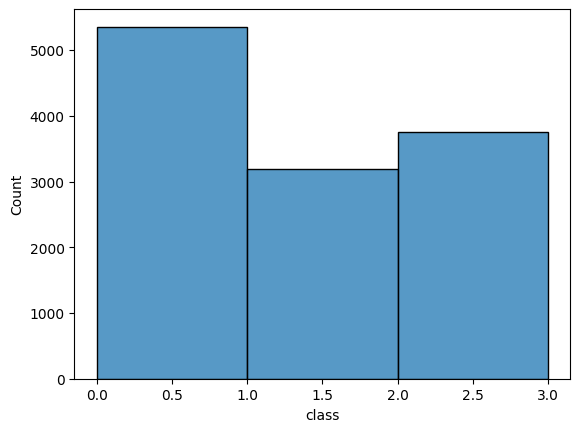

In [17]:
assert train_scores.shape[0] == train_data.shape[0]

train_scores["class"] = train_scores["HOME_WINS"] + train_scores["DRAW"]*2 + train_scores["AWAY_WINS"]*3 - 1

sns.histplot(data=train_scores, x="class", bins=range(4))
plt.show()

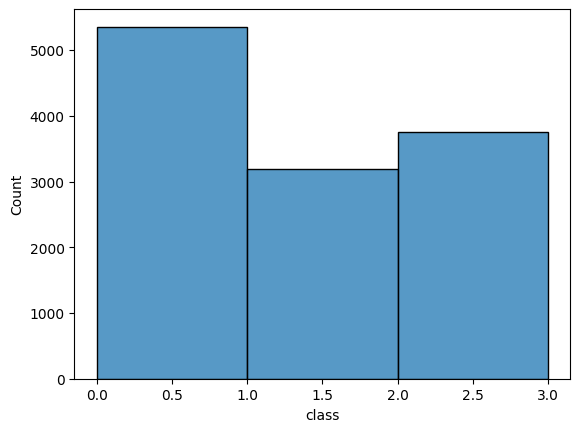

In [61]:
sns.histplot(data=train_scores, x="class", bins=range(4))
plt.show()

### Correlation matrix

In [339]:
home_corr_df = pd.concat([renamed_train_home_team_clean.drop("ID", axis=1), train_scores["class"]], axis=1).corr("pearson")
away_corr_df = pd.concat([renamed_train_away_team_clean.drop("ID", axis=1), train_scores["class"]], axis=1).corr("pearson")
diff_corr_df = pd.concat([renamed_train_diff_team, train_scores["class"]], axis=1).corr("pearson")

In [347]:
num_corr_feats = 0

threadshold = 0.85

home_feat_to_delete = []
for _, row in home_corr_df.iterrows():
    for idx in row[row>threadshold].index:
        if row.name != idx:
            if train_data[row.name].std() > train_data[idx].std():
                home_feat_to_delete.append(row.name)
            else:
                home_feat_to_delete.append(idx)
            print(f">> {row.name} ({train_data[row.name].std()}) >> {idx} ({train_data[idx].std()})")
            num_corr_feats += 1

away_feat_to_delete = []
for _, row in away_corr_df.iterrows():
    for idx in row[row>threadshold].index:
        if row.name != idx:
            if train_data[row.name].std() > train_data[idx].std():
                away_feat_to_delete.append(row.name)
            else:
                away_feat_to_delete.append(idx)
            print(f">> {row.name} ({train_data[row.name].std()}) >> {idx} ({train_data[idx].std()})")
            num_corr_feats += 1

diff_feat_to_delete = []
for _, row in diff_corr_df.iterrows():
    for idx in row[row>threadshold].index:
        if row.name != idx:
            if train_data[row.name].std() > train_data[idx].std():
                diff_feat_to_delete.append(row.name)
            else:
                diff_feat_to_delete.append(idx)
            print(f">> {row.name} ({train_data[row.name].std()}) >> {idx} ({train_data[idx].std()})")
            num_corr_feats += 1


print(len(set(home_feat_to_delete)))
print(len(set(away_feat_to_delete)))
print(len(set(diff_feat_to_delete)))


print(
    len(set(home_feat_to_delete)) +
    len(set(away_feat_to_delete)) +
    len(set(diff_feat_to_delete))
)

print(
    len(train_data.columns)
)

features_to_keep = list(set(train_data.columns) - (set(home_feat_to_delete) | set(away_feat_to_delete) | set(diff_feat_to_delete)))

>> HOME__TEAM_SHOTS_TOTAL_season_sum (2.871061617007996) >> HOME__TEAM_SHOTS_TOTAL_season_average (2.79250542422196)
>> HOME__TEAM_SHOTS_INSIDEBOX_season_sum (2.9280120458544356) >> HOME__TEAM_SHOTS_INSIDEBOX_season_average (2.8577186610945975)
>> HOME__TEAM_SHOTS_OFF_TARGET_season_sum (2.8068211305128403) >> HOME__TEAM_SHOTS_OFF_TARGET_season_average (2.7690664757296117)
>> HOME__TEAM_SHOTS_ON_TARGET_season_sum (2.8612914664683857) >> HOME__TEAM_SHOTS_ON_TARGET_season_average (2.7851405572917884)
>> HOME__TEAM_SHOTS_OUTSIDEBOX_season_sum (2.845130228978495) >> HOME__TEAM_SHOTS_OUTSIDEBOX_season_average (2.7768513580749397)
>> HOME__TEAM_PASSES_season_sum (2.9080787071445866) >> HOME__TEAM_SUCCESSFUL_PASSES_season_sum (2.9004887289329977)
>> HOME__TEAM_PASSES_season_sum (2.9080787071445866) >> HOME__TEAM_PASSES_season_average (2.861637502676013)
>> HOME__TEAM_PASSES_season_sum (2.9080787071445866) >> HOME__TEAM_SUCCESSFUL_PASSES_season_average (2.8659724554655943)
>> HOME__TEAM_SUCCESS

In [372]:
corr_df = pd.merge(train_data[features_to_keep], train_scores["class"], left_index=True, right_index=True).corr("pearson")

class_correlated_features = corr_df.loc["class"].abs().sort_values(ascending=False).index.to_list()[1:301]

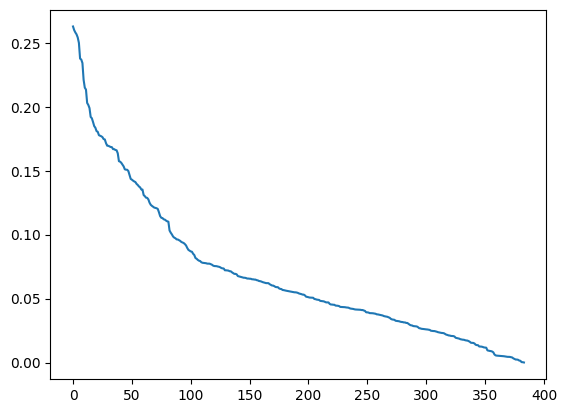

In [370]:
plt.plot(corr_df.loc["class"].abs().sort_values(ascending=False)[1:].values)

#### PCA

In [40]:
from sklearn.decomposition import PCA

features_subset = train_data.columns
pca = PCA()
pca_results = pca.fit_transform(train_data[features_subset])
print(pca.explained_variance_ratio_)

[9.01119171e-02 8.44096661e-02 2.47920264e-02 2.43855637e-02
 2.38744992e-02 2.35693234e-02 2.28769719e-02 2.16961167e-02
 2.11713641e-02 1.94949306e-02 1.86966550e-02 1.79613113e-02
 1.43192120e-02 1.41290607e-02 1.37032828e-02 1.30051864e-02
 1.26364790e-02 1.24761216e-02 1.15849878e-02 1.11339812e-02
 1.07965150e-02 1.04744039e-02 1.00645948e-02 9.65711262e-03
 9.54959082e-03 9.47632017e-03 9.24711294e-03 9.21193290e-03
 8.73291583e-03 8.44664732e-03 8.32283200e-03 8.29541805e-03
 7.98301309e-03 7.73600975e-03 7.63078723e-03 7.41336975e-03
 7.39505399e-03 7.16099467e-03 7.07576343e-03 6.88467727e-03
 6.81978646e-03 6.73102331e-03 6.46969365e-03 6.38875332e-03
 6.29073631e-03 6.10919884e-03 5.92114082e-03 5.73924073e-03
 5.56088257e-03 5.46594573e-03 5.33412576e-03 5.14489707e-03
 5.05634853e-03 5.02327693e-03 4.94473153e-03 4.72757210e-03
 4.55844846e-03 4.44666224e-03 4.32878553e-03 4.25486379e-03
 4.18633510e-03 4.12195103e-03 4.04214115e-03 3.94650227e-03
 3.91161528e-03 3.880617

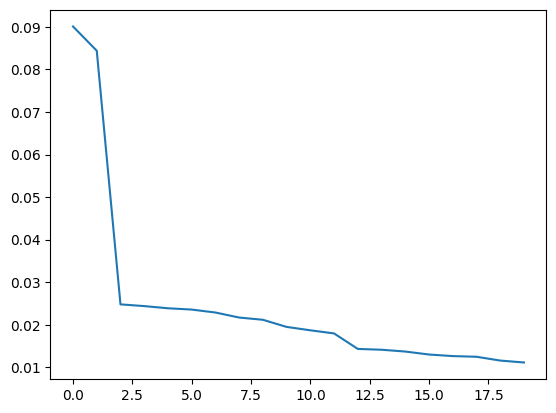

In [30]:
plt.plot(pca.explained_variance_ratio_)

# PLAYERS

In [5]:
train_home_player_base = pd.read_csv("./Train_Data/train_home_player_statistics_df.csv")
train_home_player = train_home_player_base.copy(deep=True)
train_away_player_base = pd.read_csv("./Train_Data/train_away_player_statistics_df.csv")
train_away_player = train_away_player_base.copy(deep=True)

In [22]:
train_home_player.head(10)

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
2,0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
3,0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
4,0,Ligue 1,Toulouse,NaN,Efthymios Koulouris,2.0,23.0,27.0,14.0,8.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN
5,0,Ligue 1,Toulouse,midfielder,Ibrahim Sangaré,0.0,44.0,26.0,14.0,8.0,...,0.0,34.0,53.0,8.0,46.0,77.0,NaN,NaN,NaN,NaN
6,0,Ligue 1,Toulouse,midfielder,Mathieu Dossevi,100.0,24.0,4.0,14.0,25.0,...,63.0,48.0,37.0,54.0,38.0,0.0,NaN,NaN,NaN,NaN
7,0,Ligue 1,Toulouse,defender,Nicolas Isimat-Mirin,0.0,32.0,46.0,0.0,0.0,...,0.0,0.0,37.0,0.0,25.0,77.0,NaN,NaN,NaN,NaN
8,0,Ligue 1,Toulouse,defender,Issiaga Sylla,14.0,52.0,52.0,14.0,8.0,...,0.0,28.0,55.0,23.0,55.0,77.0,NaN,NaN,NaN,NaN
9,0,Ligue 1,Toulouse,NaN,Aaron Leya Iseka,0.0,5.0,10.0,0.0,0.0,...,63.0,0.0,0.0,6.0,49.0,0.0,NaN,NaN,NaN,NaN


NA Values

In [11]:
which = "PLAYER_RATING" #"PLAYER_GOALS_CONCEDED"
if which=="all":
    print((train_home_player.isna().sum() / train_home_player.shape[0]).sort_values())
else:
    cols = [col for col in train_home_player.columns if which in col]
    print((train_home_player[cols].isna().sum() / train_home_player[cols].shape[0]).sort_values())
    

PLAYER_RATING_season_average          0.131467
PLAYER_RATING_5_last_match_average    0.131467
PLAYER_RATING_season_std              0.145534
PLAYER_RATING_5_last_match_std        0.145534
dtype: float64


In [17]:
train_home_player[train_home_player["ID"]==1][["POSITION", "PLAYER_RATING_5_last_match_average"]]

,POSITION,PLAYER_RATING_5_last_match_average
18,goalkeeper,84.0
19,midfielder,50.0
20,midfielder,89.0
21,NaN,86.0
22,midfielder,88.0
23,midfielder,98.0
24,defender,88.0
25,defender,88.0
26,midfielder,68.0
27,NaN,16.0


In [6]:
def player_proc(df_base: pd.DataFrame):

    augmented_train_X_player = pd.DataFrame()

   
    for period in ["5_last_match", "season"]:
        
        for stat in ["average", "std"]:
             # Max Rating
            augmented_train_X_player[f"PLAYER_RATING_MAX_{period}_{stat}"] = df_base.groupby("ID").apply(lambda x: x[f"PLAYER_RATING_{period}_{stat}"].max())
            for position in ["attacker", "midfielder", "defender", "goalkeeper"]:
                augmented_train_X_player[f"PLAYER_RATING_MAX_{position.upper()}_{period}_{stat}"] = df_base.groupby("ID").apply(lambda x: x[x["POSITION"]==position][f"PLAYER_RATING_{period}_{stat}"].max())

        for stat in ["average", "sum"]:
            # Max goals conceded by goalkeepers
            augmented_train_X_player[f"PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_{period}_{stat}"] = df_base.groupby("ID").apply(lambda x: x[x["POSITION"]=="goalkeeper"][f"PLAYER_GOALS_CONCEDED_{period}_{stat}"].max())

    return augmented_train_X_player


def build_player_dataset(df_home_player: pd.DataFrame, df_away_player: pd.DataFrame):
    proc_train_home_player = player_proc(df_home_player)
    print(">> proc_train_home_player DONE")
    proc_train_away_player = player_proc(df_away_player)
    print(">> proc_train_AWAY_player DONE")

    train_diff_player = proc_train_home_player - proc_train_away_player

    return proc_train_home_player, proc_train_away_player, train_diff_player

proc_train_home_player, proc_train_away_player, train_diff_player = build_player_dataset(train_home_player, train_away_player)

>> proc_train_home_player DONE
>> proc_train_AWAY_player DONE


In [21]:
train_diff_player = proc_train_home_player - proc_train_away_player

assert proc_train_home_player.shape[0] == proc_train_away_player.shape[0] == train_diff_player.shape[0]

In [7]:
def merge_player_datasets(df_home_player: pd.DataFrame, df_away_player: pd.DataFrame, df_diff_player: pd.DataFrame):


    home_cols_to_keep = list(set(df_home_player.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    away_cols_to_keep = list(set(df_away_player.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    diff_cols_to_keep = list(set(df_diff_player.columns.to_list()) - set({"TEAM_NAME", "LEAGUE"}))
    
    renamed_home_player = df_home_player[home_cols_to_keep].rename(
        columns={
            feat: f"HOME__{feat}"
            for feat in home_cols_to_keep
            if feat!="ID"
        }
    )

    renamed_away_player = df_away_player[away_cols_to_keep].rename(
        columns={
            feat: f"AWAY__{feat}"
            for feat in away_cols_to_keep
            if feat!="ID"
        }
    )

    renamed_diff_player = df_diff_player[diff_cols_to_keep].rename(
        columns={
            feat: f"DIFF__{feat}"
            for feat in diff_cols_to_keep
            if feat!="ID"
        }
    )

    train_player_dataset = pd.concat([
        renamed_home_player,
        renamed_away_player,
        renamed_diff_player
    ], axis=1)

    train_player_dataset = train_player_dataset.loc[:,~train_player_dataset.columns.duplicated()] # Remove duplicate ID columns
    
    return train_player_dataset

train_player_dataset = merge_player_datasets(proc_train_home_player, proc_train_away_player, train_diff_player)
train_player_dataset.shape



(12303, 72)

In [10]:
train_player_dataset.columns.to_list()

['HOME__PLAYER_RATING_MAX_MIDFIELDER_season_std',
 'HOME__PLAYER_RATING_MAX_GOALKEEPER_5_last_match_std',
 'HOME__PLAYER_RATING_MAX_season_std',
 'HOME__PLAYER_RATING_MAX_GOALKEEPER_season_std',
 'HOME__PLAYER_RATING_MAX_MIDFIELDER_5_last_match_average',
 'HOME__PLAYER_RATING_MAX_ATTACKER_5_last_match_average',
 'HOME__PLAYER_RATING_MAX_MIDFIELDER_5_last_match_std',
 'HOME__PLAYER_RATING_MAX_ATTACKER_5_last_match_std',
 'HOME__PLAYER_RATING_MAX_DEFENDER_season_std',
 'HOME__PLAYER_RATING_MAX_MIDFIELDER_season_average',
 'HOME__PLAYER_RATING_MAX_ATTACKER_season_average',
 'HOME__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_5_last_match_average',
 'HOME__PLAYER_RATING_MAX_5_last_match_average',
 'HOME__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_average',
 'HOME__PLAYER_RATING_MAX_DEFENDER_season_average',
 'HOME__PLAYER_RATING_MAX_GOALKEEPER_5_last_match_average',
 'HOME__PLAYER_RATING_MAX_DEFENDER_5_last_match_average',
 'HOME__PLAYER_RATING_MAX_5_last_match_std',
 'HOME__PLAYER_RATING_MAX_sea

## Data Processing

In [4]:
train_home_player['POSITION'].value_counts()

POSITION
midfielder    78524
defender      67746
goalkeeper    24298
attacker      23691
Name: count, dtype: int64

In [5]:
na_ratio = train_home_player.isnull().sum() / train_home_player.shape[0]
na_ratio[na_ratio > 0.50].index.to_list()
# Remov these features ?

train_home_player = train_home_player.drop(na_ratio[na_ratio > 0.50].index.to_list(), axis=1)

In [81]:
train_home_player["POSITION"] = train_home_player["POSITION"].fillna("UNKNOWN")

In [33]:
features_to_keep = {}

for position in train_home_player['POSITION'].unique():
    features_to_keep[position] = []
    for feat in train_home_player.columns.to_list()[5:]:
        if train_home_player[train_home_player['POSITION'] == position][feat].empty:
            print(position, feat)
        max_occ = train_home_player[train_home_player['POSITION'] == position][feat].value_counts().iloc[0]
        total_occ = train_home_player[train_home_player['POSITION'] == position][feat].value_counts().sum()
        if max_occ/total_occ > 0.8:
            print(f"Remove '{feat}' for '{position}'")
        else:
            features_to_keep[position].append(feat)

Remove 'PLAYER_CLEARANCE_OFFLINE_season_sum' for 'defender'
Remove 'PLAYER_ERROR_LEAD_TO_GOAL_season_sum' for 'defender'
Remove 'PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum' for 'defender'
Remove 'PLAYER_HIT_WOODWORK_season_sum' for 'defender'
Remove 'PLAYER_OWN_GOALS_season_sum' for 'defender'
Remove 'PLAYER_PENALTIES_MISSES_season_sum' for 'defender'
Remove 'PLAYER_PENALTIES_SAVED_season_sum' for 'defender'
Remove 'PLAYER_PENALTIES_SCORED_season_sum' for 'defender'
Remove 'PLAYER_PENALTIES_WON_season_sum' for 'defender'
Remove 'PLAYER_REDCARDS_season_sum' for 'defender'
Remove 'PLAYER_SAVES_season_sum' for 'defender'
Remove 'PLAYER_SAVES_INSIDE_BOX_season_sum' for 'defender'
Remove 'PLAYER_CLEARANCE_OFFLINE_season_average' for 'defender'
Remove 'PLAYER_ERROR_LEAD_TO_GOAL_season_average' for 'defender'
Remove 'PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average' for 'defender'
Remove 'PLAYER_HIT_WOODWORK_season_average' for 'defender'
Remove 'PLAYER_OWN_GOALS_season_average' for 'defender

In [79]:
position = ['attacker', 'midfielder', 'defender', 'goalkeeper']

train_home_player[train_home_player['POSITION'] == 'goalkeeper']["PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum"].value_counts()

PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum
0.0      8204
100.0     767
50.0      334
2.0       297
60.0      286
4.0       262
3.0       253
5.0       233
40.0      231
6.0       229
25.0      221
70.0      220
7.0       219
66.0      213
10.0      213
8.0       210
68.0      208
57.0      202
33.0      199
46.0      199
56.0      198
11.0      197
45.0      188
12.0      188
75.0      185
9.0       184
53.0      181
48.0      181
20.0      179
13.0      173
58.0      172
15.0      171
55.0      170
52.0      168
65.0      167
44.0      167
62.0      165
14.0      165
61.0      165
63.0      164
16.0      162
80.0      161
36.0      160
42.0      159
30.0      158
38.0      158
51.0      157
43.0      157
54.0      155
76.0      155
47.0      154
72.0      151
37.0      150
26.0      150
31.0      149
21.0      148
18.0      146
17.0      144
28.0      144
64.0      144
27.0      141
41.0      141
35.0      136
23.0      134
81.0      132
78.0      131
71.0      128
29.0      127
77.0

In [37]:
list(set([
    feat
    .replace("_season_sum", "")
    .replace("_season_average", "")
    .replace("_season_std", "")
    .replace("_5_last_match_sum", "")
    .replace("_5_last_match_average", "")
    .replace("_5_last_match_std", "")
    for feat in train_home_player.columns.to_list(
    )
]))

['PLAYER_STARTING_LINEUP',
 'LEAGUE',
 'PLAYER_CLEARANCES',
 'PLAYER_TACKLES',
 'PLAYER_SAVES_INSIDE_BOX',
 'PLAYER_REDCARDS',
 'PLAYER_PASSES',
 'PLAYER_SAVES',
 'PLAYER_NAME',
 'PLAYER_ACCURATE_CROSSES',
 'PLAYER_FOULS',
 'PLAYER_BIG_CHANCES_CREATED',
 'PLAYER_DUELS_WON',
 'TEAM_NAME',
 'PLAYER_ACCURATE_PASSES',
 'PLAYER_SHOTS_ON_TARGET',
 'PLAYER_AERIALS_WON',
 'PLAYER_SHOTS_BLOCKED',
 'PLAYER_HIT_WOODWORK',
 'PLAYER_OFFSIDES',
 'PLAYER_TOTAL_CROSSES',
 'PLAYER_RATING',
 'PLAYER_KEY_PASSES',
 'PLAYER_ACCURATE_PASSES_PERCENTAGE',
 'PLAYER_BLOCKED_SHOTS',
 'PLAYER_ASSISTS',
 'PLAYER_ERROR_LEAD_TO_GOAL',
 'PLAYER_DUELS_LOST',
 'PLAYER_GOALKEEPER_GOALS_CONCEDED',
 'PLAYER_OWN_GOALS',
 'PLAYER_DRIBBLED_ATTEMPTS',
 'PLAYER_GOALS_CONCEDED',
 'PLAYER_SHOTS_TOTAL',
 'PLAYER_TOTAL_DUELS',
 'PLAYER_DRIBBLED_PAST',
 'POSITION',
 'PLAYER_PENALTIES_SCORED',
 'PLAYER_DISPOSSESSED',
 'PLAYER_PENALTIES_MISSES',
 'PLAYER_PENALTIES_SAVED',
 'PLAYER_INTERCEPTIONS',
 'PLAYER_PENALTIES_COMMITTED',
 'PLAY

In [82]:
relevant_stats_goalkeeper = ["PLAYER_GOALKEEPER_GOALS_CONCEDED", ]

relevant_stats_defender = ["PLAYER_BLOCKED_SHOTS"]

relevant_stats_midfielder = ["PLAYER_GOALS"]

relevant_stats_attacker = ["PLAYER_GOALS"]

relevant_stats_all = ["PLAYER_MINUTES_PLAYED", "PLAYER_RATING", "PLAYER_STARTING_LINEUP"]

#### HOME

In [367]:
# RATING

def rating_mean(df: pd.DataFrame, scale: str):
    """Calcul la note moyenne du groupe sans prendre en compte ceux qui n'ont pas fait de match"""
    sub_df = df[df[f"PLAYER_STARTING_LINEUP_{scale}_sum"]>0]

    UNKNOWN = sub_df[sub_df["POSITION"]=="UNKNOWN"][f"PLAYER_RATING_{scale}_average"].mean()
    attacker = sub_df[sub_df["POSITION"]=="attacker"][f"PLAYER_RATING_{scale}_average"].mean()
    midfielder = sub_df[sub_df["POSITION"]=="midfielder"][f"PLAYER_RATING_{scale}_average"].mean()
    defender = sub_df[sub_df["POSITION"]=="defender"][f"PLAYER_RATING_{scale}_average"].mean()
    goalkeeper = sub_df[sub_df["POSITION"]=="goalkeeper"][f"PLAYER_RATING_{scale}_average"].mean()

    return pd.DataFrame(data=[[UNKNOWN, attacker, midfielder, defender, goalkeeper]],
                        columns=[
                            f'PLAYER_RATING_{scale}_average_UNKNOWN', 
                            f'PLAYER_RATING_{scale}_average_attacker',
                            f'PLAYER_RATING_{scale}_average_midfielder',
                            f'PLAYER_RATING_{scale}_average_defender',
                            f'PLAYER_RATING_{scale}_average_goalkeeper'
                            ])

PLAYER_RATING_season_average = train_home_player.groupby(["ID"]).apply(lambda x: rating_mean(x, scale="season")).reset_index(level=0).reset_index(drop=True)
PLAYER_RATING_5_last_match_average = train_home_player.groupby(["ID"]).apply(lambda x: rating_mean(x, scale="5_last_match")).reset_index(level=0).reset_index(drop=True)

In [374]:
PLAYER_RATING_average = pd.merge(PLAYER_RATING_season_average, PLAYER_RATING_5_last_match_average, on='ID')

In [375]:
PLAYER_RATING_average.isna().sum() / PLAYER_RATING_average.shape[0]

ID                                               0.000000
PLAYER_RATING_season_average_UNKNOWN             0.568398
PLAYER_RATING_season_average_attacker            0.559457
PLAYER_RATING_season_average_midfielder          0.211493
PLAYER_RATING_season_average_defender            0.211900
PLAYER_RATING_season_average_goalkeeper          0.203121
PLAYER_RATING_5_last_match_average_UNKNOWN       0.569617
PLAYER_RATING_5_last_match_average_attacker      0.560432
PLAYER_RATING_5_last_match_average_midfielder    0.211574
PLAYER_RATING_5_last_match_average_defender      0.211900
PLAYER_RATING_5_last_match_average_goalkeeper    0.211493
dtype: float64

In [397]:
a = train_home_player.groupby(["ID"]).apply(lambda x: len(x["POSITION"].unique())==5)
a[a==True]

ID
250      True
1635     True
2556     True
3227     True
3898     True
4049     True
4587     True
6594     True
6736     True
8851     True
10962    True
dtype: bool

In [399]:
train_home_player[train_home_player["ID"] == 250]

,ID,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,...,PLAYER_SAVES_INSIDE_BOX_5_last_match_std,PLAYER_SHOTS_BLOCKED_5_last_match_std,PLAYER_SHOTS_ON_TARGET_5_last_match_std,PLAYER_SHOTS_TOTAL_5_last_match_std,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std
4870,250,Pro League,Antwerp,midfielder,Frank Boya,0.0,5.0,9.0,6.0,5.0,...,0.0,66.0,0.0,49.0,77.0,0.0,25.0,10.0,47.0,0.0
4871,250,Pro League,Antwerp,midfielder,Martin Hongla,1.0,61.0,16.0,13.0,5.0,...,0.0,40.0,0.0,45.0,0.0,30.0,0.0,10.0,13.0,63.0
4872,250,Pro League,Antwerp,defender,Dylan Batubinsika,0.0,40.0,30.0,0.0,5.0,...,0.0,33.0,0.0,15.0,77.0,0.0,46.0,0.0,23.0,0.0
4873,250,Pro League,Antwerp,midfielder,Aurélio Buta,12.0,14.0,2.0,13.0,10.0,...,0.0,0.0,0.0,0.0,63.0,0.0,15.0,40.0,14.0,77.0
4874,250,Pro League,Antwerp,goalkeeper,Jean Butez,0.0,25.0,3.0,0.0,0.0,...,23.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,2.0,0.0
4875,250,Pro League,Antwerp,attacker,Dieumerci Mbokani,0.0,20.0,95.0,13.0,20.0,...,0.0,0.0,44.0,31.0,77.0,19.0,12.0,0.0,100.0,63.0
4876,250,Pro League,Antwerp,goalkeeper,Ortwin De Wolf,0.0,13.0,7.0,6.0,5.0,...,73.0,0.0,0.0,0.0,63.0,0.0,0.0,0.0,8.0,0.0
4877,250,Pro League,Antwerp,midfielder,Pieter Gerkens,20.0,42.0,24.0,13.0,20.0,...,0.0,0.0,22.0,19.0,77.0,0.0,15.0,29.0,17.0,0.0
4878,250,Pro League,Antwerp,midfielder,Koji Miyoshi,8.0,12.0,0.0,6.0,20.0,...,0.0,0.0,22.0,15.0,0.0,0.0,25.0,21.0,5.0,0.0
4879,250,Pro League,Antwerp,midfielder,J. Lukaku,20.0,18.0,4.0,6.0,10.0,...,0.0,0.0,0.0,0.0,0.0,56.0,36.0,44.0,23.0,0.0


In [354]:
# attacker Goals

def goal_mean(df: pd.DataFrame, scale: str, position: str):
    sub_df = df[df["POSITION"]==position]
    return sub_df[f"PLAYER_GOALS_{scale}_average"].mean()

ATTACKERS_GOALS_season_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_mean(x, scale="season", position="attacker")).to_frame(name="ATTACKERS_GOALS_season_average").reset_index()
ATTACKERS_GOALS_5_last_match_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_mean(x, scale="5_last_match", position="attacker")).to_frame(name="ATTACKERS_GOALS_5_last_match_average").reset_index()
UNKNOWN_GOALS_season_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_mean(x, scale="season", position="UNKNOWN"))
UNKNOWN_GOALS_5_last_match_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_mean(x, scale="5_last_match", position="UNKNOWN"))

In [356]:
ATTACKERS_GOALS_average = pd.merge(ATTACKERS_GOALS_season_average, ATTACKERS_GOALS_5_last_match_average, on="ID")

In [362]:
ATTACKERS_GOALS_average.isna().sum() / ATTACKERS_GOALS_average.shape[0]

ID                                      0.000000
ATTACKERS_GOALS_season_average          0.530033
ATTACKERS_GOALS_5_last_match_average    0.530033
dtype: float64

In [170]:
# goal keeper goal conceded

def goal_conceded_max(df: pd.DataFrame, scale: str):

    sub_df = df[df["POSITION"].isin(["goalkeeper"])]
    sub_df["new_feat"] = sub_df[f"PLAYER_GOALKEEPER_GOALS_CONCEDED_{scale}_average"]*sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"]
    return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()

PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_conceded_max(x, scale="season"))
PLAYER_GOALKEEPER_GOALS_CONCEDED_5_last_match_average = train_home_player.groupby(["ID"]).apply(lambda x: goal_conceded_max(x, scale="5_last_match"))

/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()
/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()
/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()
/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()
/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value encountered in scalar divide
  return sub_df["new_feat"].sum()/sub_df[f"PLAYER_STARTING_LINEUP_{scale}_average"].sum()
/tmp/ipykernel_2150/1617351643.py:7: RuntimeWarning: invalid value enc

In [168]:
train_home_player[train_home_player["ID"]==0][["POSITION", "PLAYER_NAME", "PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average", "PLAYER_STARTING_LINEUP_season_average"]]

,POSITION,PLAYER_NAME,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average,PLAYER_STARTING_LINEUP_season_average
0,defender,Agustín Rogel,0.0,100.0
1,defender,Mathieu Goncalves,0.0,28.0
2,goalkeeper,Baptiste Reynet,100.0,100.0
3,midfielder,Jean-Victor Makengo,0.0,61.0
4,UNKNOWN,Efthymios Koulouris,0.0,76.0
5,midfielder,Ibrahim Sangaré,0.0,100.0
6,midfielder,Mathieu Dossevi,0.0,69.0
7,defender,Nicolas Isimat-Mirin,0.0,72.0
8,defender,Issiaga Sylla,0.0,100.0
9,UNKNOWN,Aaron Leya Iseka,0.0,16.0


### PCA

In [10]:
from sklearn.decomposition import PCA

features_subset = list(set(train_home_player_clean.columns) - set({"ID", "POSITION", "PLAYER_NAME"}))

pca = PCA()
pca_results = pca.fit_transform(train_home_player_clean[features_subset])
print(pca.explained_variance_ratio_)

[3.02787919e-01 1.00913419e-01 7.05729806e-02 4.15988293e-02
 3.87676658e-02 2.64845769e-02 2.28841265e-02 1.83125060e-02
 1.47061782e-02 1.39165472e-02 1.30860787e-02 1.23002854e-02
 1.15359184e-02 1.09048561e-02 1.08376311e-02 1.04301493e-02
 9.76078440e-03 9.60201544e-03 9.19202797e-03 8.87453507e-03
 8.46536418e-03 7.58496900e-03 7.30395916e-03 7.18885337e-03
 6.84695411e-03 6.59545228e-03 6.43595521e-03 6.24392402e-03
 6.08059037e-03 5.90170805e-03 5.86559675e-03 5.55735944e-03
 5.49380015e-03 5.00282149e-03 4.58683656e-03 4.45403708e-03
 4.36053468e-03 4.29529672e-03 3.86636429e-03 3.73861156e-03
 3.44406404e-03 3.17130164e-03 3.13473914e-03 3.02417843e-03
 2.94122349e-03 2.79793591e-03 2.75125421e-03 2.57577264e-03
 2.48927723e-03 2.42850783e-03 2.40309706e-03 2.33989834e-03
 2.26839688e-03 2.19237397e-03 2.10228534e-03 2.06881927e-03
 1.94231237e-03 1.88256932e-03 1.84212969e-03 1.82474188e-03
 1.75326564e-03 1.67428147e-03 1.61445898e-03 1.60230457e-03
 1.57606305e-03 1.563227

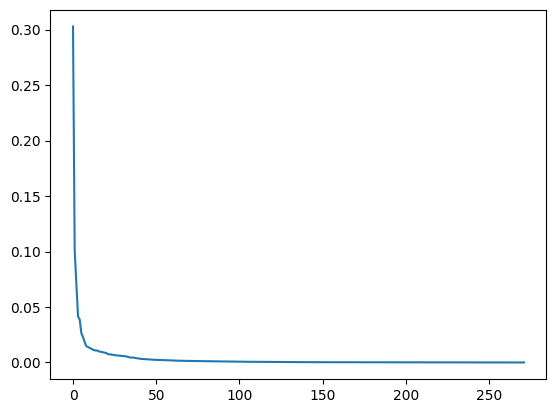

In [19]:
plt.plot(pca.explained_variance_ratio_.tolist())
plt.show()

# => only 50 firsts components are usefull

# TEAM + PLAYER

In [8]:
train_dataset_with_na = pd.merge(
    train_team_dataset,
    train_player_dataset,
    left_index=True,
    right_index=True,
)


train_dataset = train_dataset_with_na.fillna({
    feat: train_dataset_with_na[feat].mean() 
    if "DIFF" in feat
    else train_dataset_with_na[feat].median()
    for feat in train_dataset_with_na.columns
})

train_dataset.shape

(12303, 650)

In [ ]:
train_dataset[["HOME__PLAYER_RATING_MAX_ATTACKER_5_last_match_sum", "HOME__PLAYER_RATING_MAX_ATTACKER_5_last_match_average"]]

## Features selection

### Features correlation

In [9]:
corr_df = train_dataset.corr("pearson")

In [10]:
threadshold = 0.8

feats_to_delete = []
for _, row in corr_df.iterrows():
    for idx in row[row>threadshold].index:
        if row.name != idx:
            if train_dataset[row.name].std() > train_dataset[idx].std():
                feats_to_delete.append(row.name)
            else:
                feats_to_delete.append(idx)
            print(f">> {row.name} ({train_dataset[row.name].std()}) >> {idx} ({train_dataset[idx].std()})")

>> HOME__TEAM_CORNERS_EVOLUTION_average (2.521607250736701) >> HOME__TEAM_CORNERS_EVOLUTION_sum (2.2307808587946734)
>> HOME__TEAM_GAME_DRAW_5_last_match_average (3.0994702322209333) >> HOME__TEAM_GAME_DRAW_5_last_match_sum (3.099501395364931)
>> HOME__TEAM_SHOTS_OFF_TARGET_season_average (2.7690664757296117) >> HOME__TEAM_SHOTS_OFF_TARGET_season_sum (2.8068211305128403)
>> HOME__TEAM_SHOTS_ON_TARGET_5_last_match_sum (2.7731117727386008) >> HOME__TEAM_SHOTS_ON_TARGET_5_last_match_average (2.775801739445199)
>> HOME__TEAM_GAME_WON_PERCENTAGE_5_last_match (2.5190063525305577) >> HOME__TEAM_GAME_WON_5_last_match_average (2.980047764020447)
>> HOME__TEAM_GAME_WON_PERCENTAGE_5_last_match (2.5190063525305577) >> HOME__TEAM_GAME_WON_5_last_match_sum (2.980363521210639)
>> HOME__TEAM_OFFSIDES_season_average (2.7561948479158906) >> HOME__TEAM_OFFSIDES_season_sum (2.8297739120440384)
>> HOME__TEAM_ATTACKS_season_sum (2.7814865088778866) >> HOME__TEAM_ATTACKS_season_average (2.7396684265589117)
>

In [11]:
len(set(feats_to_delete))

232

In [12]:
features_to_keep = list(set(train_dataset.columns) - set(feats_to_delete))
len(features_to_keep)

418

### Correlation with target

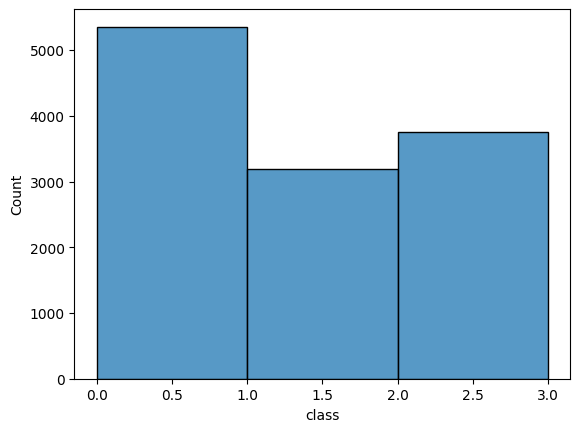

In [13]:
assert train_scores.shape[0] == train_dataset.shape[0]

train_scores["class"] = train_scores["HOME_WINS"] + train_scores["DRAW"]*2 + train_scores["AWAY_WINS"]*3 - 1

sns.histplot(data=train_scores, x="class", bins=range(4))
plt.show()

In [14]:
corr_target_df = pd.merge(train_dataset[features_to_keep], train_scores["class"], left_index=True, right_index=True).corr("pearson")

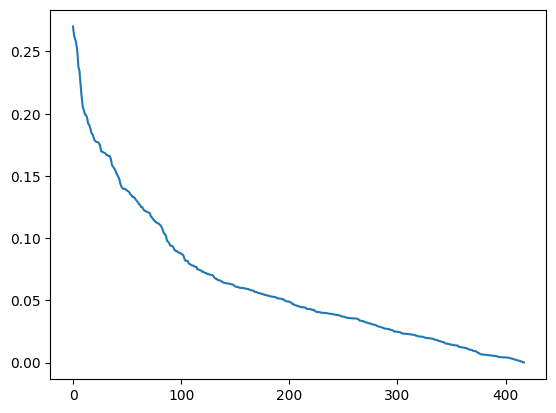

In [15]:
plt.plot(corr_target_df.loc["class"].abs().sort_values(ascending=False)[1:].values)

In [16]:
number_to_keep = 250
class_correlated_features = corr_target_df.loc["class"].abs().sort_values(ascending=False).index.to_list()[1:number_to_keep+1]

### Features_importance - xgboost

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset[class_correlated_features], train_scores["class"], train_size=0.8, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(2461, 250)
(7873, 250)
(1969, 250)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
important_features_list = []

nb_iter_xgboost = 5

for i in range(nb_iter_xgboost):

    # processing

    X_train, X_test, y_train, y_test = train_test_split(train_dataset[class_correlated_features], train_scores["class"], train_size=0.8, shuffle=True)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

    print(X_test.shape)
    print(X_train.shape)
    print(X_valid.shape)

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
    X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

    # xgboost

    max_depth = random.randint(3, 4)
    learning_rate = random.uniform(0.001, 0.1)
    print(f">>>> max_depth : {max_depth}")
    print(f">>>> learning_rate : {learning_rate}")

    params_1 = {
        'booster': 'gbtree',
        'tree_method':'hist',
        'max_depth': max_depth, 
        'learning_rate': learning_rate,
        'objective': 'multi:softprob',
        'num_class': 3,
        'eval_metric':'mlogloss'
    }

    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)

    num_round = 10000
    evallist = [(d_train, 'train'), (d_valid, 'eval')]

    eval_results = {}
    bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100, evals_result=eval_results)

    important_features = list(dict(sorted(bst.get_score().items(), key=lambda item: item[1], reverse=True)).keys())
    important_features_list.append(important_features)


(2461, 250)
(7873, 250)
(1969, 250)
>>>> max_depth : 3
>>>> learning_rate : 0.05315585873073412
[0]	train-mlogloss:1.09219	eval-mlogloss:1.09270
[1]	train-mlogloss:1.08621	eval-mlogloss:1.08701
[2]	train-mlogloss:1.08076	eval-mlogloss:1.08164
[3]	train-mlogloss:1.07568	eval-mlogloss:1.07686


/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	train-mlogloss:1.07088	eval-mlogloss:1.07235
[5]	train-mlogloss:1.06642	eval-mlogloss:1.06844
[6]	train-mlogloss:1.06215	eval-mlogloss:1.06480
[7]	train-mlogloss:1.05821	eval-mlogloss:1.06126
[8]	train-mlogloss:1.05451	eval-mlogloss:1.05804
[9]	train-mlogloss:1.05098	eval-mlogloss:1.05485
[10]	train-mlogloss:1.04764	eval-mlogloss:1.05220
[11]	train-mlogloss:1.04455	eval-mlogloss:1.04955
[12]	train-mlogloss:1.04161	eval-mlogloss:1.04726
[13]	train-mlogloss:1.03885	eval-mlogloss:1.04502
[14]	train-mlogloss:1.03624	eval-mlogloss:1.04304
[15]	train-mlogloss:1.03378	eval-mlogloss:1.04111
[16]	train-mlogloss:1.03140	eval-mlogloss:1.03925
[17]	train-mlogloss:1.02918	eval-mlogloss:1.03758
[18]	train-mlogloss:1.02700	eval-mlogloss:1.03589
[19]	train-mlogloss:1.02498	eval-mlogloss:1.03446
[20]	train-mlogloss:1.02305	eval-mlogloss:1.03309
[21]	train-mlogloss:1.02118	eval-mlogloss:1.03177
[22]	train-mlogloss:1.01933	eval-mlogloss:1.03035
[23]	train-mlogloss:1.01761	eval-mlogloss:1.02913
[24]	t

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-mlogloss:1.09728	eval-mlogloss:1.09754
[6]	train-mlogloss:1.09706	eval-mlogloss:1.09736
[7]	train-mlogloss:1.09684	eval-mlogloss:1.09719
[8]	train-mlogloss:1.09662	eval-mlogloss:1.09701
[9]	train-mlogloss:1.09640	eval-mlogloss:1.09683
[10]	train-mlogloss:1.09618	eval-mlogloss:1.09665
[11]	train-mlogloss:1.09596	eval-mlogloss:1.09648
[12]	train-mlogloss:1.09574	eval-mlogloss:1.09630
[13]	train-mlogloss:1.09553	eval-mlogloss:1.09613
[14]	train-mlogloss:1.09531	eval-mlogloss:1.09595
[15]	train-mlogloss:1.09509	eval-mlogloss:1.09578
[16]	train-mlogloss:1.09488	eval-mlogloss:1.09560
[17]	train-mlogloss:1.09466	eval-mlogloss:1.09542
[18]	train-mlogloss:1.09445	eval-mlogloss:1.09525
[19]	train-mlogloss:1.09424	eval-mlogloss:1.09508
[20]	train-mlogloss:1.09402	eval-mlogloss:1.09491
[21]	train-mlogloss:1.09381	eval-mlogloss:1.09473
[22]	train-mlogloss:1.09360	eval-mlogloss:1.09456
[23]	train-mlogloss:1.09338	eval-mlogloss:1.09439
[24]	train-mlogloss:1.09317	eval-mlogloss:1.09422
[25]	

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	train-mlogloss:1.07815	eval-mlogloss:1.08082
[5]	train-mlogloss:1.07458	eval-mlogloss:1.07779
[6]	train-mlogloss:1.07109	eval-mlogloss:1.07481
[7]	train-mlogloss:1.06770	eval-mlogloss:1.07201
[8]	train-mlogloss:1.06452	eval-mlogloss:1.06928
[9]	train-mlogloss:1.06141	eval-mlogloss:1.06664
[10]	train-mlogloss:1.05843	eval-mlogloss:1.06427
[11]	train-mlogloss:1.05555	eval-mlogloss:1.06185
[12]	train-mlogloss:1.05264	eval-mlogloss:1.05959
[13]	train-mlogloss:1.04989	eval-mlogloss:1.05734
[14]	train-mlogloss:1.04725	eval-mlogloss:1.05540
[15]	train-mlogloss:1.04461	eval-mlogloss:1.05331
[16]	train-mlogloss:1.04212	eval-mlogloss:1.05129
[17]	train-mlogloss:1.03966	eval-mlogloss:1.04959
[18]	train-mlogloss:1.03729	eval-mlogloss:1.04780
[19]	train-mlogloss:1.03498	eval-mlogloss:1.04601
[20]	train-mlogloss:1.03282	eval-mlogloss:1.04424
[21]	train-mlogloss:1.03061	eval-mlogloss:1.04280
[22]	train-mlogloss:1.02852	eval-mlogloss:1.04129
[23]	train-mlogloss:1.02653	eval-mlogloss:1.03989
[24]	t

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[5]	train-mlogloss:1.06946	eval-mlogloss:1.07406
[6]	train-mlogloss:1.06553	eval-mlogloss:1.07091
[7]	train-mlogloss:1.06178	eval-mlogloss:1.06794
[8]	train-mlogloss:1.05826	eval-mlogloss:1.06521
[9]	train-mlogloss:1.05494	eval-mlogloss:1.06264
[10]	train-mlogloss:1.05178	eval-mlogloss:1.06026
[11]	train-mlogloss:1.04879	eval-mlogloss:1.05811
[12]	train-mlogloss:1.04591	eval-mlogloss:1.05603
[13]	train-mlogloss:1.04323	eval-mlogloss:1.05418
[14]	train-mlogloss:1.04066	eval-mlogloss:1.05227
[15]	train-mlogloss:1.03818	eval-mlogloss:1.05045
[16]	train-mlogloss:1.03584	eval-mlogloss:1.04891
[17]	train-mlogloss:1.03359	eval-mlogloss:1.04730
[18]	train-mlogloss:1.03140	eval-mlogloss:1.04591
[19]	train-mlogloss:1.02930	eval-mlogloss:1.04477
[20]	train-mlogloss:1.02733	eval-mlogloss:1.04352
[21]	train-mlogloss:1.02543	eval-mlogloss:1.04218
[22]	train-mlogloss:1.02365	eval-mlogloss:1.04113
[23]	train-mlogloss:1.02193	eval-mlogloss:1.03992
[24]	train-mlogloss:1.02024	eval-mlogloss:1.03889
[25]	

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	train-mlogloss:1.07857	eval-mlogloss:1.08273
[5]	train-mlogloss:1.07512	eval-mlogloss:1.08005
[6]	train-mlogloss:1.07174	eval-mlogloss:1.07762
[7]	train-mlogloss:1.06860	eval-mlogloss:1.07520
[8]	train-mlogloss:1.06552	eval-mlogloss:1.07295
[9]	train-mlogloss:1.06264	eval-mlogloss:1.07098
[10]	train-mlogloss:1.05986	eval-mlogloss:1.06890
[11]	train-mlogloss:1.05715	eval-mlogloss:1.06695
[12]	train-mlogloss:1.05460	eval-mlogloss:1.06510
[13]	train-mlogloss:1.05215	eval-mlogloss:1.06350
[14]	train-mlogloss:1.04980	eval-mlogloss:1.06170
[15]	train-mlogloss:1.04750	eval-mlogloss:1.06015
[16]	train-mlogloss:1.04530	eval-mlogloss:1.05867
[17]	train-mlogloss:1.04322	eval-mlogloss:1.05713
[18]	train-mlogloss:1.04119	eval-mlogloss:1.05584
[19]	train-mlogloss:1.03926	eval-mlogloss:1.05450
[20]	train-mlogloss:1.03736	eval-mlogloss:1.05334
[21]	train-mlogloss:1.03554	eval-mlogloss:1.05201
[22]	train-mlogloss:1.03375	eval-mlogloss:1.05099
[23]	train-mlogloss:1.03203	eval-mlogloss:1.04995
[24]	t

In [20]:
# Keep union of the most important features of each xgboost

nb_imp = 183

final_features = set(class_correlated_features)
for iter in range(nb_iter_xgboost):
    final_features = final_features & set(important_features_list[iter][:nb_imp])
final_features = list(final_features)

print(f"Number of final features : {len(final_features)}")
final_features

Number of final features : 97


['AWAY__TEAM_DANGEROUS_ATTACKS_EVOLUTION_average',
 'HOME__TEAM_SUCCESSFUL_PASSES_EVOLUTION_sum',
 'DIFF__TEAM_INJURIES_season_std',
 'DIFF__TEAM_GOALS_season_average',
 'DIFF__TEAM_SAVES_5_last_match_std',
 'AWAY__TEAM_ATTACKS_EVOLUTION_average',
 'DIFF__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_5_last_match_average',
 'DIFF__TEAM_FOULS_season_std',
 'HOME__TEAM_GAME_WON_PERCENTAGE_season',
 'AWAY__TEAM_INJURIES_EVOLUTION_average',
 'DIFF__PLAYER_RATING_MAX_DEFENDER_5_last_match_average',
 'HOME__TEAM_SHOTS_ON_TARGET_EVOLUTION_std',
 'AWAY__TEAM_SHOTS_ON_TARGET_EVOLUTION_std',
 'DIFF__TEAM_DANGEROUS_ATTACKS_season_average',
 'HOME__TEAM_SHOTS_ON_TARGET_EVOLUTION_sum',
 'DIFF__TEAM_SAVES_5_last_match_average',
 'DIFF__TEAM_SAVES_season_std',
 'HOME__TEAM_SHOTS_INSIDEBOX_EVOLUTION_sum',
 'DIFF__TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std',
 'AWAY__TEAM_GAME_LOST_EVOLUTION_sum',
 'AWAY__TEAM_GOALS_season_std',
 'DIFF__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_average',
 'HOME__TEAM_SHOTS_I

# TRAINING

#### XGBOOST classic

In [201]:
X_train, X_test, y_train, y_test = train_test_split(train_data[class_correlated_features], train_scores["class"], train_size=0.8, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

KeyError: "['DIFF__TEAM_SHOTS_INSIDEBOX_season_average', 'DIFF__TEAM_GAME_WON_season_average', 'DIFF__TEAM_SHOTS_ON_TARGET_season_average', 'DIFF__TEAM_GOALS_season_average', 'DIFF__TEAM_GAME_LOST_season_average', 'DIFF__TEAM_DANGEROUS_ATTACKS_season_average', 'DIFF__TEAM_CORNERS_season_average', 'DIFF__TEAM_SHOTS_INSIDEBOX_5_last_match_sum', 'DIFF__TEAM_ATTACKS_season_sum', 'DIFF__TEAM_PASSES_5_last_match_sum', 'DIFF__TEAM_SHOTS_ON_TARGET_5_last_match_sum', 'DIFF__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_sum', 'DIFF__TEAM_DANGEROUS_ATTACKS_5_last_match_average', 'DIFF__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_average', 'DIFF__TEAM_SHOTS_OFF_TARGET_season_average', 'DIFF__TEAM_GAME_WON_5_last_match_average', 'DIFF__TEAM_GOALS_5_last_match_sum', 'DIFF__TEAM_GAME_LOST_5_last_match_average', 'DIFF__TEAM_GOALS_season_std', 'DIFF__TEAM_CORNERS_5_last_match_sum', 'DIFF__TEAM_SAVES_season_average', 'DIFF__TEAM_ATTACKS_5_last_match_average', 'DIFF__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_5_last_match_average', 'DIFF__PLAYER_RATING_MAX_season_average', 'DIFF__TEAM_SHOTS_ON_TARGET_season_std', 'DIFF__TEAM_SHOTS_INSIDEBOX_season_std', 'DIFF__TEAM_SHOTS_OFF_TARGET_5_last_match_sum', 'HOME__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_sum', 'AWAY__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_sum', 'DIFF__TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std', 'DIFF__TEAM_SHOTS_TOTAL_season_std', 'HOME__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_average', 'DIFF__TEAM_CORNERS_season_std', 'DIFF__PLAYER_RATING_MAX_MIDFIELDER_5_last_match_average', 'DIFF__TEAM_DANGEROUS_ATTACKS_season_std', 'DIFF__PLAYER_RATING_MAX_MIDFIELDER_season_average', 'DIFF__TEAM_SUCCESSFUL_PASSES_season_std', 'AWAY__PLAYER_GOALS_CONCEDED_MAX_GOALKEEPER_season_average', 'DIFF__TEAM_SAVES_5_last_match_average', 'DIFF__TEAM_SHOTS_OUTSIDEBOX_season_average', 'DIFF__TEAM_GOALS_5_last_match_std', 'DIFF__TEAM_SHOTS_OFF_TARGET_season_std', 'DIFF__TEAM_ATTACKS_season_std', 'DIFF__TEAM_SAVES_season_std', 'DIFF__TEAM_OFFSIDES_season_average', 'DIFF__TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std', 'DIFF__PLAYER_RATING_MAX_DEFENDER_5_last_match_average', 'DIFF__TEAM_PENALTIES_season_std', 'DIFF__TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum', 'DIFF__PLAYER_RATING_MAX_DEFENDER_season_average', 'DIFF__PLAYER_RATING_MAX_ATTACKER_season_average', 'DIFF__TEAM_SHOTS_TOTAL_5_last_match_std', 'DIFF__TEAM_YELLOWCARDS_season_average', 'DIFF__TEAM_DANGEROUS_ATTACKS_5_last_match_std', 'DIFF__TEAM_SHOTS_ON_TARGET_5_last_match_std', 'DIFF__TEAM_BALL_SAFE_season_average', 'DIFF__TEAM_SHOTS_INSIDEBOX_5_last_match_std', 'DIFF__TEAM_FOULS_season_average', 'DIFF__TEAM_BALL_SAFE_season_sum', 'DIFF__PLAYER_RATING_MAX_ATTACKER_5_last_match_average', 'HOME__PLAYER_RATING_MAX_season_average', 'HOME__PLAYER_RATING_MAX_MIDFIELDER_5_last_match_average', 'DIFF__TEAM_SHOTS_OUTSIDEBOX_season_std', 'DIFF__TEAM_OFFSIDES_5_last_match_sum', 'DIFF__TEAM_PASSES_5_last_match_std', 'AWAY__PLAYER_RATING_MAX_5_last_match_average', 'DIFF__TEAM_SHOTS_OFF_TARGET_5_last_match_std', 'DIFF__TEAM_PENALTIES_5_last_match_average', 'DIFF__TEAM_INJURIES_season_average', 'DIFF__TEAM_FOULS_5_last_match_average', 'DIFF__TEAM_CORNERS_5_last_match_std', 'DIFF__TEAM_FOULS_season_std', 'DIFF__TEAM_ATTACKS_5_last_match_std', 'AWAY__PLAYER_RATING_MAX_MIDFIELDER_5_last_match_average', 'DIFF__TEAM_SHOTS_OUTSIDEBOX_5_last_match_std', 'DIFF__TEAM_YELLOWCARDS_5_last_match_sum', 'DIFF__TEAM_INJURIES_5_last_match_average', 'AWAY__PLAYER_RATING_MAX_ATTACKER_5_last_match_average', 'DIFF__TEAM_OFFSIDES_season_std', 'DIFF__TEAM_INJURIES_season_std', 'DIFF__TEAM_SAVES_5_last_match_std', 'HOME__PLAYER_RATING_MAX_DEFENDER_season_average', 'AWAY__PLAYER_RATING_MAX_DEFENDER_5_last_match_average', 'HOME__PLAYER_RATING_MAX_DEFENDER_5_last_match_average', 'DIFF__TEAM_OFFSIDES_5_last_match_std'] not in index"

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

In [ ]:
params_1 = {
    'booster': 'gbtree',
    'tree_method':'hist',
    'max_depth': 4, 
    'learning_rate': 0.01,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
}


d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid, y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

eval_results = {}
bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100, evals_result=eval_results)

[0]	train-mlogloss:1.09720	eval-mlogloss:1.09743


/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[1]	train-mlogloss:1.09581	eval-mlogloss:1.09623
[2]	train-mlogloss:1.09444	eval-mlogloss:1.09509
[3]	train-mlogloss:1.09309	eval-mlogloss:1.09393
[4]	train-mlogloss:1.09176	eval-mlogloss:1.09278
[5]	train-mlogloss:1.09046	eval-mlogloss:1.09165
[6]	train-mlogloss:1.08916	eval-mlogloss:1.09057
[7]	train-mlogloss:1.08788	eval-mlogloss:1.08953
[8]	train-mlogloss:1.08662	eval-mlogloss:1.08846
[9]	train-mlogloss:1.08537	eval-mlogloss:1.08743
[10]	train-mlogloss:1.08415	eval-mlogloss:1.08635
[11]	train-mlogloss:1.08294	eval-mlogloss:1.08532
[12]	train-mlogloss:1.08175	eval-mlogloss:1.08434
[13]	train-mlogloss:1.08057	eval-mlogloss:1.08336
[14]	train-mlogloss:1.07940	eval-mlogloss:1.08239
[15]	train-mlogloss:1.07824	eval-mlogloss:1.08147
[16]	train-mlogloss:1.07710	eval-mlogloss:1.08051
[17]	train-mlogloss:1.07597	eval-mlogloss:1.07960
[18]	train-mlogloss:1.07484	eval-mlogloss:1.07870
[19]	train-mlogloss:1.07374	eval-mlogloss:1.07782
[20]	train-mlogloss:1.07265	eval-mlogloss:1.07689
[21]	trai

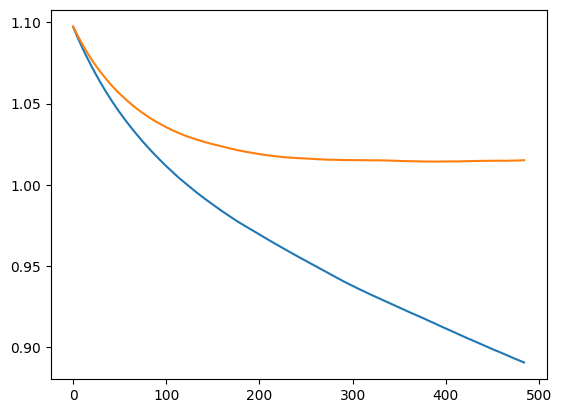

In [ ]:
plt.plot(eval_results['train']['mlogloss'])
plt.plot(eval_results['eval']['mlogloss'])

In [ ]:
target = train_scores.loc[X_test.index].copy().drop(["ID", "class"], axis=1)

X_test_xgb = xgb.DMatrix(X_test)

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)

np.round(accuracy_score(predictions, target), 4)

0.4937

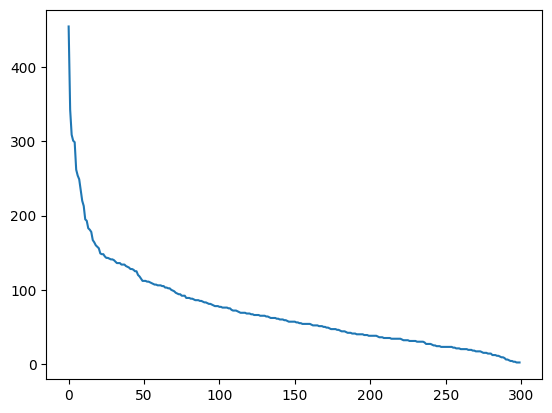

In [ ]:
important_features = list(dict(sorted(bst.get_score().items(), key=lambda item: item[1], reverse=True)).keys())

plt.plot(dict(sorted(bst.get_score().items(), key=lambda item: item[1], reverse=True)).values())

In [ ]:
xgb.plot_importance(bst, max_num_features=100)
fig = plt.gcf()
fig.set_size_inches(15, 20)

#### XGBOOST

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset[final_features], train_scores["class"], train_size=0.8, shuffle=True)

print(X_test.shape)
print(X_train.shape)

(2461, 97)
(9842, 97)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [23]:
from sklearn.model_selection import RandomizedSearchCV

params = {
 'learning_rate' : [0.01, 0.1],
 'max_depth' : [ 3, 4],
 'min_child_weight' : [ 1, 3, 5],
 'gamma': [0.1, 0.2],
 'n_estimators': [80, 100]
}

xgboost = xgb.XGBClassifier()

clf = RandomizedSearchCV(
    xgboost,
    param_distributions=params,
    random_state=42,
    n_iter=200,
    cv=3,
    n_jobs=1,
    return_train_score=True,
    verbose=3,
)

clf.fit(X_train, y_train)

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=80;, score=(train=0.505, test=0.497) total time=   0.6s
[CV 2/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=80;, score=(train=0.507, test=0.487) total time=   1.1s
[CV 3/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=80;, score=(train=0.501, test=0.481) total time=   1.1s
[CV 1/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=(train=0.506, test=0.499) total time=   1.0s
[CV 2/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=(train=0.507, test=0.487) total time=   1.0s
[CV 3/3] END gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=(train=0.503, test=0.485) total time=   0.7s
[CV 1/3] END gamma=0.1, learning_rate=0.01, max_depth=3, mi

/home/morel/.local/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=200, n_jobs=1,
                   param_distributions={'gamma': [0.1, 0.2],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [80, 100]},
                   random_state=42, return_train_score=True, verbose=3)

In [24]:
print(clf.best_score_)
print(clf.best_params_)

0.49278650421371634
{'n_estimators': 80, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}


In [37]:
#### 130

best_score = 0.49105839732582024
best_params = {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2}


#### 80
best_score = 0.49298888897148646
best_params = {'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}

#### 120 important

best_score = 0.48801094872423884
best_params = {'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.0}


#### 150 features with 3 filters

best_score = 0.49014428973914853
best_params = {'n_estimators': 60, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2}

#### 100 features with 3 filters

best_score = 0.4913632134264043
best_params = {'n_estimators': 80, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2}


################################ TEAM + PLAYER ########################

best_score = 0.49441121956175366
best_params = {'n_estimators': 120, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.2}


best_score = 0.4957330701773948
best_params = {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1}


best_score = 0.49014515701389866
best_params = {'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1}

best_score = 0.491262268840305
best_params = {'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 0.1}

best_score = 0.49278650421371634
best_params = {'n_estimators': 80, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}


In [25]:
target = train_scores.loc[X_test.index].copy().drop(["ID", "class"], axis=1)

predictions = clf.best_estimator_.predict_proba(X_test)
predictions = pd.DataFrame(predictions)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)

np.round(accuracy_score(predictions, target), 4)

0.4945

In [ ]:
clf = xgb.XGBClassifier(
    booster = 'gbtree',
    tree_method ='hist',
    max_depth = 3, 
    learning_rate = 0.1,
    objective = 'multi:softprob',
    num_class = 3,
    eval_metric ='mlogloss',
    n_estimators = 80,
    min_child_weight = 3,
    gamma = 0.2
)

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
print(scores)
print(scores.mean())
print(scores.std())

[0.49568309 0.47993906 0.48221545 0.48323171 0.47815041]
0.48384394083910365
0.006178295681451419


In [ ]:
target = train_scores.loc[X_test.index].copy().drop(["ID", "class"], axis=1)

predictions = clf.predict_proba(X_test)
predictions = pd.DataFrame(predictions)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)

np.round(accuracy_score(predictions, target), 4)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
first_important_features = important_features[:200]
most_correlated_features = correlated_features[:200]

In [ ]:
print(len(first_important_features))
print(len(most_correlated_features))

final_feats = list(set(first_important_features) & set(most_correlated_features))
print(len(final_feats))
final_feats

200
200
65


['DIFF__TEAM_DANGEROUS_ATTACKS_5_last_match_sum',
 'HOME__TEAM_SHOTS_INSIDEBOX_PERCENTAGE_season',
 'DIFF__TEAM_SUCCESSFUL_PASSES_season_sum',
 'HOME__TEAM_BALL_POSSESSION_season_average',
 'AWAY__TEAM_GAME_WON_PERCENTAGE_5_last_match',
 'DIFF__TEAM_GAME_LOST_season_average',
 'DIFF__TEAM_GAME_WON_season_sum',
 'DIFF__TEAM_DANGEROUS_ATTACKS_season_average',
 'HOME__TEAM_DANGEROUS_ATTACKS_5_last_match_sum',
 'DIFF__TEAM_GAME_WON_season_average',
 'DIFF__TEAM_GAME_LOST_5_last_match_sum',
 'DIFF__TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_std',
 'DIFF__TEAM_SHOTS_INSIDEBOX_5_last_match_average',
 'AWAY__TEAM_GAME_LOST_PERCENTAGE_5_last_match',
 'HOME__TEAM_GAME_LOST_PERCENTAGE_5_last_match',
 'HOME__TEAM_GAME_WON_PERCENTAGE_5_last_match',
 'DIFF__TEAM_SHOTS_TOTAL_season_sum',
 'DIFF__TEAM_SAVES_season_sum',
 'HOME__TEAM_ATTACKS_season_average',
 'DIFF__TEAM_GAME_LOST_season_sum',
 'DIFF__TEAM_PASSES_season_average',
 'HOME__TEAM_CORNERS_5_last_match_sum',
 'DIFF__TEAM_SHOTS_OFF_TARGET

#### MLP Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_scores["class"], train_size=0.85, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(1846, 578)
(8365, 578)
(2092, 578)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(50, 100, 70, 50),
    alpha=1,
    max_iter=1000,
    random_state=42,
    verbose=True,
    learning_rate='adaptive',
    learning_rate_init= 0.004,
)
clf.fit(X_train, y_train)

Iteration 1, loss = 1.50568374
Iteration 2, loss = 1.15542504
Iteration 3, loss = 1.07069786
Iteration 4, loss = 1.04647348
Iteration 5, loss = 1.03829058
Iteration 6, loss = 1.03300694
Iteration 7, loss = 1.03502491
Iteration 8, loss = 1.02761236
Iteration 9, loss = 1.02597402
Iteration 10, loss = 1.02441951
Iteration 11, loss = 1.02216101
Iteration 12, loss = 1.02375146
Iteration 13, loss = 1.02078062
Iteration 14, loss = 1.01179334
Iteration 15, loss = 1.00986559
Iteration 16, loss = 1.00744165
Iteration 17, loss = 1.00567743
Iteration 18, loss = 1.00554036
Iteration 19, loss = 0.99906839
Iteration 20, loss = 0.99544682
Iteration 21, loss = 1.00068604
Iteration 22, loss = 0.99308015
Iteration 23, loss = 0.99033688
Iteration 24, loss = 0.98811732
Iteration 25, loss = 0.98282517
Iteration 26, loss = 0.99053492
Iteration 27, loss = 0.97695158
Iteration 28, loss = 0.97166529
Iteration 29, loss = 0.97702509
Iteration 30, loss = 0.97364310
Iteration 31, loss = 0.97279638
Iteration 32, los

MLPClassifier(alpha=1, hidden_layer_sizes=(50, 100, 70, 50),
              learning_rate='adaptive', learning_rate_init=0.004, max_iter=1000,
              random_state=42, verbose=True)

In [ ]:
target = train_scores.loc[X_test.index].copy().drop(["ID", "class"], axis=1)

predictions = clf.predict_proba(X_test)
predictions = pd.DataFrame(predictions)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)

np.round(accuracy_score(predictions, target), 4)

0.4025

#### Logistic Regression

In [ ]:
logistic_train_data = train_data.copy(deep=True)
logistic_train_data = logistic_train_data[important_features_safe[:70]]

for feat in logistic_train_data.columns:
    logistic_train_data[feat] = logistic_train_data[feat].fillna(logistic_train_data[feat].median())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(logistic_train_data, train_scores["class"], train_size=0.85, shuffle=True)

print(X_test.shape)
print(X_train.shape)

(1846, 70)
(10457, 70)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [10, 50, 100, 200]
}

search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=params,
    random_state=42,
    n_iter=200,
    cv=3,
    n_jobs=1,
    return_train_score=True,
    verbose=3,
    scoring="accuracy"
)

search.fit(X_train, y_train)

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=200. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 1/3] END C=0.1, max_iter=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.1, max_iter=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.1, max_iter=10, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.1, max_iter=10, penalty=l2;, score=(train=0.498, test=0.497) total time=   0.1s
[CV 2/3] END C=0.1, max_iter=10, penalty=l2;, score=(train=0.506, test=0.480) total time=   0.0s


/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END C=0.1, max_iter=10, penalty=l2;, score=(train=0.503, test=0.495) total time=   0.2s
[CV 1/3] END C=0.1, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.1, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.1, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.1, max_iter=50, penalty=l2;, score=(train=0.500, test=0.497) total time=   0.4s
[CV 2/3] END C=0.1, max_iter=50, penalty=l2;, score=(train=0.507, test=0.478) total time=   0.3s
[CV 3/3] END C=0.1, max_iter=50, penalty=l2;, score=(train=0.504, test=0.491) total time=   0.2s
[CV 1/3] END C=0.1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=0.1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=0.1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=0.1, max_iter=100, penalty=l2;, scor

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/3] END C=1, max_iter=50, penalty=l2;, score=(train=0.500, test=0.498) total time=   0.2s
[CV 2/3] END C=1, max_iter=50, penalty=l2;, score=(train=0.507, test=0.478) total time=   0.1s
[CV 3/3] END C=1, max_iter=50, penalty=l2;, score=(train=0.504, test=0.491) total time=   0.1s
[CV 1/3] END C=1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=1, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=1, max_iter=100, penalty=l2;, score=(train=0.500, test=0.498) total time=   0.1s
[CV 2/3] END C=1, max_iter=100, penalty=l2;, score=(train=0.507, test=0.478) total time=   0.2s
[CV 3/3] END C=1, max_iter=100, penalty=l2;, score=(train=0.504, test=0.491) total time=   0.3s
[CV 1/3] END C=1, max_iter=200, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=1, max_iter=200, penalty=l1;, score=(train=n

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 1/3] END C=10, max_iter=50, penalty=l2;, score=(train=0.500, test=0.498) total time=   0.2s
[CV 2/3] END C=10, max_iter=50, penalty=l2;, score=(train=0.507, test=0.479) total time=   0.1s
[CV 3/3] END C=10, max_iter=50, penalty=l2;, score=(train=0.504, test=0.492) total time=   0.2s
[CV 1/3] END C=10, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=10, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=10, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=10, max_iter=100, penalty=l2;, score=(train=0.500, test=0.498) total time=   0.1s
[CV 2/3] END C=10, max_iter=100, penalty=l2;, score=(train=0.507, test=0.479) total time=   0.2s
[CV 3/3] END C=10, max_iter=100, penalty=l2;, score=(train=0.504, test=0.492) total time=   0.1s
[CV 1/3] END C=10, max_iter=200, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=10, max_iter=200, penalty=l1;, sco

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[CV 3/3] END C=100, max_iter=10, penalty=l2;, score=(train=0.504, test=0.494) total time=   0.0s
[CV 1/3] END C=100, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=100, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=100, max_iter=50, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=100, max_iter=50, penalty=l2;, score=(train=0.500, test=0.498) total time=   0.4s
[CV 2/3] END C=100, max_iter=50, penalty=l2;, score=(train=0.507, test=0.479) total time=   0.5s
[CV 3/3] END C=100, max_iter=50, penalty=l2;, score=(train=0.504, test=0.491) total time=   0.1s
[CV 1/3] END C=100, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END C=100, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END C=100, max_iter=100, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END C=100, max_iter=100, penalty=l2;, scor

/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/morel/anaconda3/envs/envqube/lib/python3.1

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=200, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'max_iter': [10, 50, 100, 200],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=3)

In [ ]:
search.best_params_

{'penalty': 'l2', 'max_iter': 10, 'C': 10}

In [ ]:
target = train_scores.loc[X_test.index].copy().drop(["ID", "class"], axis=1)

predictions = search.best_estimator_.predict_proba(X_test)
predictions = pd.DataFrame(predictions)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)

np.round(accuracy_score(predictions, target), 4)

0.5005

#### Cross Validation - Gardient Boosting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_scores["class"], train_size=0.85, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=True)

print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(1846, 578)
(8365, 578)
(2092, 578)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(
    verbose=1,
    learning_rate=0.001,
    max_depth=3,
    validation_fraction=0.1
)


scores = cross_val_score(clf, X_train, y_train, cv=5, verbose=1)

      Iter       Train Loss   Remaining Time 
         1           1.0633            1.74m
         2           1.0539            1.70m
         3           1.0458            1.69m
         4           1.0389            1.67m
         5           1.0326            1.66m
         6           1.0271            1.63m
         7           1.0221            1.62m
         8           1.0176            1.61m
         9           1.0134            1.59m
        10           1.0095            1.60m
        20           0.9792            1.62m
        30           0.9563            1.49m
        40           0.9364            1.24m
        50           0.9165            1.04m
        60           0.8982           49.75s
        70           0.8805           36.99s
        80           0.8635           24.77s
        90           0.8475           12.28s
       100           0.8317            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0631            1.89m
        

KeyboardInterrupt: 

#### Feature selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(clf.best_estimator_, n_features_to_select=8)
sfs.fit(X_train, y_train)


SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None, gamma=0.1,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.1,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=3, max_leaves=None,
                                                  min_child_weight=3,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  objective='multi:softprob', ...),
                          n_features_to_select=8)

In [ ]:
sfs.get_feature_names_out().tolist()

sfs_selected_feats = sfs.get_feature_names_out().tolist()

On peut faire des groupes de feature

## Tracks for a better prediction :

- inclure la league
- CV Grid
- Supprimer des champs très correlés
- Supprimer les champs très vides (>20%)

# SUBMISSION

#### Train on all Dataset

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data[important_features[:100]], train_scores["class"], train_size=0.8, shuffle=True)
X_train.shape

(9842, 100)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

In [40]:
params_1 = {
    'booster': 'gbtree',
    'tree_method':'hist',
    'max_depth': 6, 
    'learning_rate': 0.05,
    'objective': 'multi:softprob',
    'num_class': 3,
    'eval_metric':'mlogloss'
}

d_train_sub = xgb.DMatrix(X_train, y_train)
d_valid_sub = xgb.DMatrix(X_valid, y_valid)

num_round = 10000
evallist = [(d_train_sub, 'train'), (d_valid_sub, 'eval')]

eval_results = {}
bst_sub = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100, evals_result=eval_results)

[0]	train-mlogloss:1.09126	eval-mlogloss:1.09152
[1]	train-mlogloss:1.08444	eval-mlogloss:1.08482
[2]	train-mlogloss:1.07821	eval-mlogloss:1.07834


/home/morel/anaconda3/envs/envqube/lib/python3.11/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[3]	train-mlogloss:1.07257	eval-mlogloss:1.07238
[4]	train-mlogloss:1.06709	eval-mlogloss:1.06707
[5]	train-mlogloss:1.06126	eval-mlogloss:1.06147
[6]	train-mlogloss:1.05634	eval-mlogloss:1.05650
[7]	train-mlogloss:1.05135	eval-mlogloss:1.05157
[8]	train-mlogloss:1.04639	eval-mlogloss:1.04657
[9]	train-mlogloss:1.04195	eval-mlogloss:1.04202
[10]	train-mlogloss:1.03740	eval-mlogloss:1.03725
[11]	train-mlogloss:1.03332	eval-mlogloss:1.03316
[12]	train-mlogloss:1.02929	eval-mlogloss:1.02909
[13]	train-mlogloss:1.02565	eval-mlogloss:1.02564
[14]	train-mlogloss:1.02199	eval-mlogloss:1.02197
[15]	train-mlogloss:1.01845	eval-mlogloss:1.01865
[16]	train-mlogloss:1.01520	eval-mlogloss:1.01533
[17]	train-mlogloss:1.01137	eval-mlogloss:1.01171
[18]	train-mlogloss:1.00787	eval-mlogloss:1.00809
[19]	train-mlogloss:1.00528	eval-mlogloss:1.00531
[20]	train-mlogloss:1.00169	eval-mlogloss:1.00188
[21]	train-mlogloss:0.99886	eval-mlogloss:0.99913
[22]	train-mlogloss:0.99623	eval-mlogloss:0.99654
[23]	tr

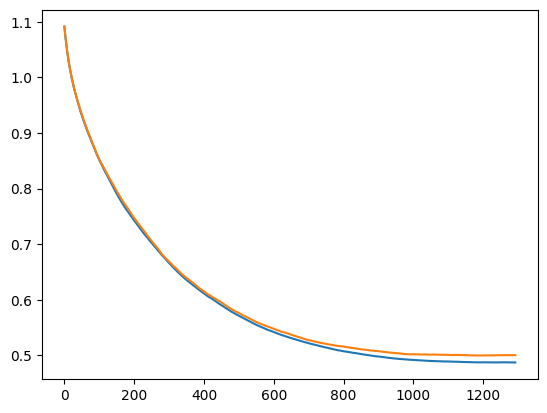

In [41]:
plt.plot(eval_results['train']['mlogloss'])
plt.plot(eval_results['eval']['mlogloss'])

#### Prediction for submission

In [26]:
# free space

del train_home_player
del train_away_player
del train_home_team
del train_away_team
del train_dataset

In [27]:
test_home_team = pd.read_csv('./Test_Data/test_home_team_statistics_df.csv', index_col=0)
test_away_team = pd.read_csv('./Test_Data/test_away_team_statistics_df.csv', index_col=0)

test_home_player = pd.read_csv('./Test_Data/test_home_player_statistics_df.csv', index_col=0)
test_away_player = pd.read_csv('./Test_Data/test_away_player_statistics_df.csv', index_col=0)

In [30]:
proc_test_home_team, proc_test_away_team, test_diff_team = build_team_dataset(test_home_team, test_away_team)
test_team_dataset = merge_team_datasets(proc_test_home_team, proc_test_away_team, test_diff_team)

In [31]:
proc_test_home_player, proc_test_away_player, test_diff_player = build_player_dataset(test_home_player, test_away_player)
test_player_dataset = merge_player_datasets(proc_test_home_player, proc_test_away_player, test_diff_player)

>> proc_train_home_player DONE
>> proc_train_AWAY_player DONE


In [34]:
test_dataset_with_na = pd.merge(
    test_team_dataset,
    test_player_dataset,
    left_index=True,
    right_index=True,
)

test_dataset_with_na = test_dataset_with_na[final_features]

test_dataset = test_dataset_with_na.fillna({
    feat: test_dataset_with_na[feat].mean() 
    if "DIFF" in feat
    else test_dataset_with_na[feat].median()
    for feat in test_dataset_with_na.columns
})

test_dataset.shape

(25368, 97)

#### xgboost submission

In [47]:
# X_test = xgb.DMatrix(test_dataset)

predictions = clf.best_estimator_.predict_proba(test_dataset)
predictions = pd.DataFrame(predictions, index=test_dataset.index)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)
predictions.head(20)

,HOME_WINS,DRAW,AWAY_WINS
12303,0,0,1
12304,0,0,1
12305,1,0,0
12306,0,1,0
12307,0,1,0
12308,1,0,0
12309,0,0,1
12310,0,0,1
12311,0,1,0
12312,0,0,1


#### sklearn submission

In [496]:
predictions = clf.predict_proba(X_test_subm)
predictions = pd.DataFrame(predictions, index=test_data.index)

predictions[["HOME_WINS", "DRAW", "AWAY_WINS"]] = predictions.apply(
    lambda x: pd.Series([
        int(x[0]==x[[0, 1, 2]].max()),
        int(x[1]==x[[0, 1, 2]].max()),
        int(x[2]==x[[0, 1, 2]].max())
    ]), axis=1)
predictions.drop([0, 1, 2], axis=1, inplace=True)
predictions.head(10)

,HOME_WINS,DRAW,AWAY_WINS
12303,1,0,0
12304,0,0,1
12305,1,0,0
12306,1,0,0
12307,0,0,1
12308,1,0,0
12309,0,0,1
12310,0,0,1
12311,0,0,1
12312,0,0,1


In [48]:
predictions.sum()

HOME_WINS    9161
DRAW         8343
AWAY_WINS    7864
dtype: int64

In [49]:
predictions.to_csv("prediction6_xgb_99_player.csv")

In [216]:
predictions.shape

(25368, 3)

In [474]:
res3 = pd.read_csv("./prediction4.csv", index_col=0)

In [476]:
res3.sum()

HOME_WINS    20225
DRAW           987
AWAY_WINS     4156
dtype: int64